In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

import statsmodels.formula.api as sm
import scipy, scipy.stats
import math
from collections import Counter

In [2]:
df = pd.read_csv("LGD.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ac_No                15290 non-null  int64  
 1   Age                  15290 non-null  int64  
 2   Years of Experience  15290 non-null  int64  
 3   Number of Vehicles   15290 non-null  int64  
 4   Gender               15290 non-null  object 
 5   Married              15290 non-null  object 
 6   Losses in Thousands  15290 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 836.3+ KB


In [4]:
df.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


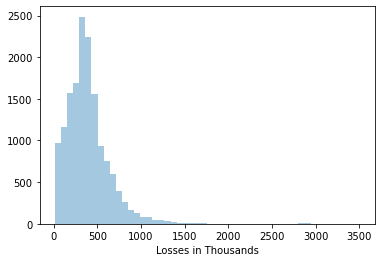

In [5]:
sns.distplot(df["Losses in Thousands"],kde=False,bins = 50)

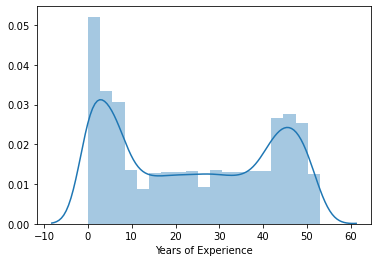

In [6]:
sns.distplot(df['Years of Experience'])

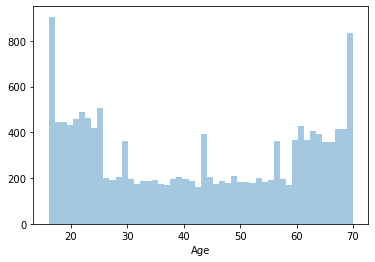

In [7]:
sns.distplot(df['Age'],kde=False,bins =50)

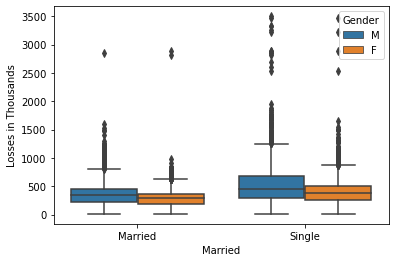

In [8]:
sns.boxplot(df['Married'],df['Losses in Thousands'],data=df,hue ="Gender")

In [9]:
df.corr()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands
Ac_No,1.000000,0.008291,0.008437,-0.003056,-0.000794
Age,0.008291,1.000000,0.997161,0.008366,-0.442962
Years of Experience,0.008437,0.997161,1.000000,0.008545,-0.442115
Number of Vehicles,-0.003056,0.008366,0.008545,1.000000,-0.011553
Losses in Thousands,-0.000794,-0.442962,-0.442115,-0.011553,1.000000


In [10]:
dummy_var1=pd.get_dummies(df['Gender'],drop_first=True)
dummy_var1.head()

,M
0,1
1,0
2,1
3,0
4,1


In [11]:
dummy_var2=pd.get_dummies(df['Married'],drop_first=True)
dummy_var2.head()

,Single
0,0
1,1
2,0
3,0
4,1


In [12]:
#merge df1 with df2

In [13]:
df_new = pd.concat([df,dummy_var1,dummy_var2],axis=1)
df_new.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,M,Single
0,150024,24,5,1,M,Married,203.319595,1,0
1,144880,31,10,1,F,Single,402.197302,0,1
2,133742,56,37,1,M,Married,553.132096,1,0
3,151282,52,31,1,F,Married,292.430579,0,0
4,174407,20,3,1,M,Single,246.540576,1,1


In [14]:
df_new2=df_new.drop(['Gender','Married'],axis = 1)
df_new2.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,M,Single
0,150024,24,5,1,203.319595,1,0
1,144880,31,10,1,402.197302,0,1
2,133742,56,37,1,553.132096,1,0
3,151282,52,31,1,292.430579,0,0
4,174407,20,3,1,246.540576,1,1


In [17]:
#decide your regressor and predictor variables
x = df_new2[["Age","Number of Vehicles","M","Single"]]
y = df_new["Losses in Thousands"]

#split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)


from sklearn.linear_model import LinearRegression # import the functions
lm=LinearRegression() #call the function
lm.fit(x_train,y_train) # fit the model

print(lm.intercept_) # see the intercept
print(lm.coef_) # see the betas
#see the error parameters
from sklearn import metrics

#make prediction
pred=lm.predict(x_test)
print(metrics.mean_absolute_error(y_test,pred))
from sklearn.metrics import r2_score
r2_score(y_test, pred)

539.6565230110674
[ -6.14900704  -1.79059246  97.23493268 136.7922503 ]
148.50819212153985


0.29505257544943864

In [19]:
#so the linear regression equation we get is
#----loss in thousands=539.65-6.14*Age-1.79*Number of Vehicles+97*M+136*Single
#so according to above--
#Young people (- coeff)and Male(+ coeff) & Unmarried person(+coeff)
#dont pay their loans back
#lets get the P values of each predictors 

import statsmodels.api as sm
from statsmodels.api import add_constant
X2 = add_constant(x_train)
lm= sm.OLS(y_train,X2)
lm2=lm.fit()
lm2.pvalues
# sm.OLS by default does not add an intercept in the model.
#so we manually added it by the first line

const                  0.000000e+00
Age                    0.000000e+00
Number of Vehicles     4.052234e-01
M                     1.470589e-121
Single                6.953054e-233
dtype: float64

In [20]:
#to see the summary
print(lm2.summary())

                             OLS Regression Results                            
Dep. Variable:     Losses in Thousands   R-squared:                       0.305
Model:                             OLS   Adj. R-squared:                  0.304
Method:                  Least Squares   F-statistic:                     1171.
Date:                 Thu, 19 Nov 2020   Prob (F-statistic):               0.00
Time:                         16:43:07   Log-Likelihood:                -72503.
No. Observations:                10703   AIC:                         1.450e+05
Df Residuals:                    10698   BIC:                         1.451e+05
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                539.6

In [21]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [22]:
regression_model.score(x_train, y_train)

0.3045506169220349